<a href="https://colab.research.google.com/github/Tejashwinicb2004/machinelearning/blob/main/Linear_vs_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BostonHousingData.csv', header=None)

In [3]:
df = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values again after conversion
print("Number of NaN values in each column after conversion:")
print(df.isnull().sum())

Number of NaN values in each column after conversion:
0     21
1     21
2     21
3     21
4      1
5      1
6     21
7      1
8      1
9      1
10     1
11     1
12    21
13     1
dtype: int64


In [4]:
df = df.dropna()

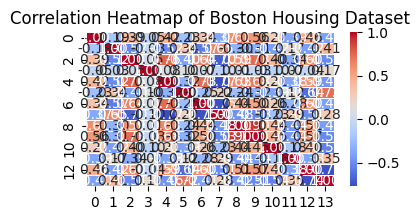

In [5]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

In [6]:
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [7]:
y_pred = linreg.predict(X)

RMSE: 4.41
MAE: 3.06


Text(0.5, 1.0, 'Residuals vs Predicted Values')

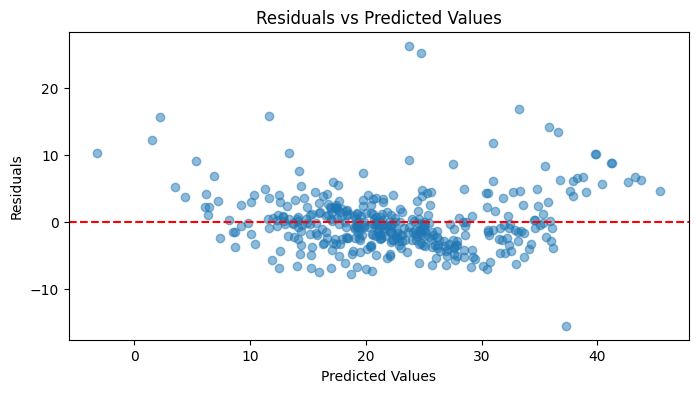

In [8]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
residual = y - y_pred
# Plot the residuals
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

In [9]:
mean_residual = np.mean(residual)
std_residual = np.std(residual)

# Define a threshold for outliers (e.g., 3 standard deviations)
# Residuals greater than (3 \times standard deviation of residuals are often considered outliers.
threshold = 3 * std_residual

# Identify outliers
outliers = np.where(np.abs(residual - mean_residual) > threshold)[0]

# Ensure residual is a NumPy array or reset the index if it's a pandas Series
residual = np.array(residual)  # Convert to NumPy array if necessary

# Print the outlier indices and their residuals
print("Outlier Indices:", outliers)
print("Outlier Residuals:", residual[outliers])

Outlier Indices: [130 134 285 286 288 289 290 320]
Outlier Residuals: [ 14.14663552  13.37905586 -15.42343472  15.81944072  16.78412419
  26.2604199   25.23061769  15.62852693]


In [10]:
print("Model Coefficients (slopes):", linreg.coef_)
print("Model Intercept:", linreg.intercept_)

Model Coefficients (slopes): [-9.75937645e-02  4.89049306e-02  3.03789814e-02  2.76937811e+00
 -1.79690282e+01  4.28325195e+00 -1.29907658e-02 -1.45850997e+00
  2.85865617e-01 -1.31464154e-02 -9.14582415e-01  9.65574144e-03
 -4.23660746e-01]
Model Intercept: 32.680058543306174


In [11]:
actual_output = 27.5 # Actual output for the 101st observation
print(f"Actual output for the input case: {actual_output:.2f}")
input_case = np.array([0.14866,	0,	8.56,	0,	0.52,	6.727,	79.9,	2.7778,	5,	384,	20.9,	394.76,	9.42]).reshape(1, -1)
# Predict the output using the trained model
predicted_value = linreg.predict(input_case)
print(f"Predicted value for the input case: {predicted_value[0]:.2f}")
# Calculate the residual
residual = actual_output - predicted_value[0]
print(f"Residual: {residual:.2f}")

Actual output for the input case: 27.50
Predicted value for the input case: 24.39
Residual: 3.11


Polynomial Regression RMSE: 0.00
Polynomial Regression MAE: 0.00


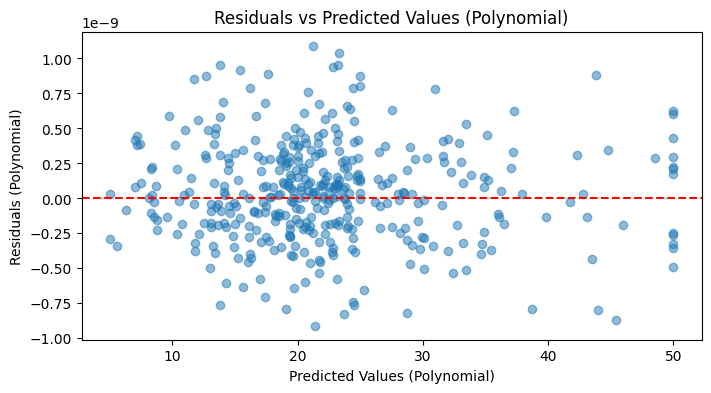

In [12]:
from sklearn.preprocessing import PolynomialFeatures

polyreg = PolynomialFeatures(degree=4)
X_poly = polyreg.fit_transform(X)  # Transform the features to polynomial features
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly, y)  # Fit the polynomial regression model
# Make predictions on the training set using the polynomial model
y_pred_poly = linreg_poly.predict(X_poly)
# Calculate RMSE and MAE for polynomial regression
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
mae_poly = mean_absolute_error(y, y_pred_poly)
print(f"Polynomial Regression RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression MAE: {mae_poly:.2f}")
# Plot the residuals for polynomial regression
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_poly, y - y_pred_poly, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Polynomial)')
plt.ylabel('Residuals (Polynomial)')
plt.title('Residuals vs Predicted Values (Polynomial)')
plt.show()